### Cardio Vascular Disease Prediction:-

Dataset Link:-https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('cardio.csv',delimiter=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### All of the dataset values were collected at the moment of medical examination.

#### Features:-

1.Age | Objective Feature | age | int (days)

2.Height | Objective Feature | height | int (cm) |

3.Weight | Objective Feature | weight | float (kg) |

4.Gender | Objective Feature | gender | categorical code |

5.Systolic blood pressure | Examination Feature | ap_hi | int |

6.Diastolic blood pressure | Examination Feature | ap_lo | int |

7.Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

8.Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

9.Smoking | Subjective Feature | smoke | binary |

10.Alcohol intake | Subjective Feature | alco | binary |

11.Physical activity | Subjective Feature | active | binary |

12.Presence or absence of cardiovascular disease | Target Variable | cardio | binary |



';' is the character used to seprate the values in given dataset.

 There are 70000 rows and 13 columns in above dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


 There is no null values in above Dataset.

In [4]:
df.shape

(70000, 13)

There is 70000 rows and 13 columns in above dataset.

In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

There no null values seens in above dataset.

In [6]:
df.duplicated().sum()

0

No duplicate value is seen.

## Data Preprocessing

In [7]:
df.drop('id',axis=1,inplace=True)

We delete id column because there is no use for further processing.

#### We will take age in years completed

In [8]:
df['age']=round(df['age']/365)

In [9]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


Data of age columns is in days we convert this in years. 

<AxesSubplot:xlabel='height', ylabel='Density'>

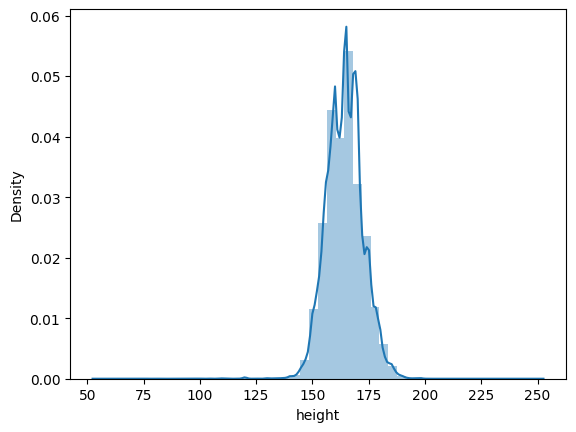

In [10]:
sns.distplot(df['height'])

In this dataset most of peoples having 'height' in between 150-175 cm.

<AxesSubplot:xlabel='age', ylabel='Density'>

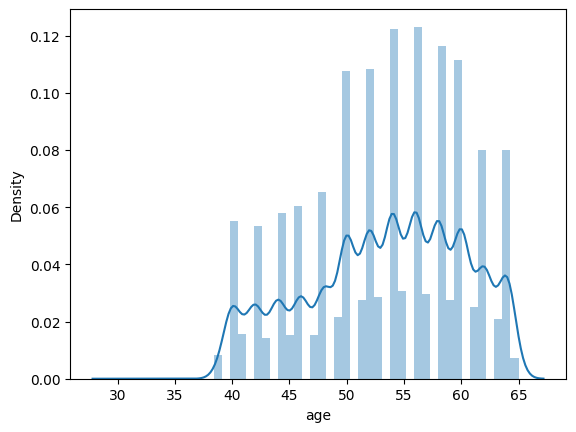

In [11]:
sns.distplot(df['age'])

Here we findout the unique value of diastolic blood pressure.

In [12]:
df.shape

(70000, 12)

In [13]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

0    35021
1    34979
Name: cardio, dtype: int64


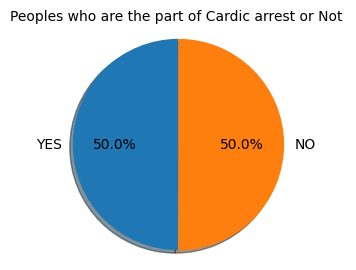

In [14]:
print(df.cardio.value_counts())
labels = 'YES', 'NO'
sizes = [df.cardio[df['cardio']==1].count(), df.cardio[df['cardio']==0].count()]
explode = (0, 0)
fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Peoples who are the part of Cardic arrest or Not ", size = 10)
plt.show()

* By seeing above chart we can say that dataset is balanced
* Possibility of death chances is more than its vice versa

<AxesSubplot:xlabel='weight', ylabel='Density'>

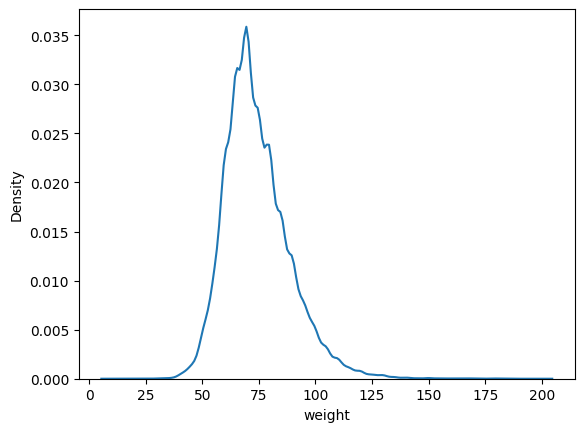

In [15]:
sns.distplot(df['weight'],hist=False)

In this dataset the most peoples is having weight 75 kg. 

<AxesSubplot:xlabel='gender', ylabel='count'>

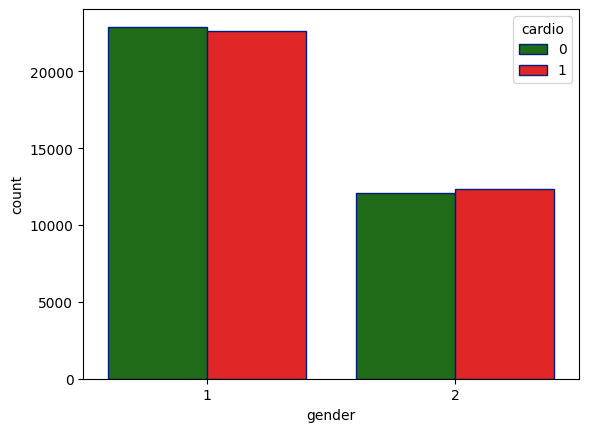

In [16]:
#sns.countplot(x=df['gender'],hue=df['cardio'],palette="dark")

sns.countplot(x='gender',hue='cardio',data=df,palette=['#137909','#ff0707'],edgecolor=sns.color_palette('dark',n_colors=1))

1-Female
2-Male

The rate of cardio is nearly equal in both genders.

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

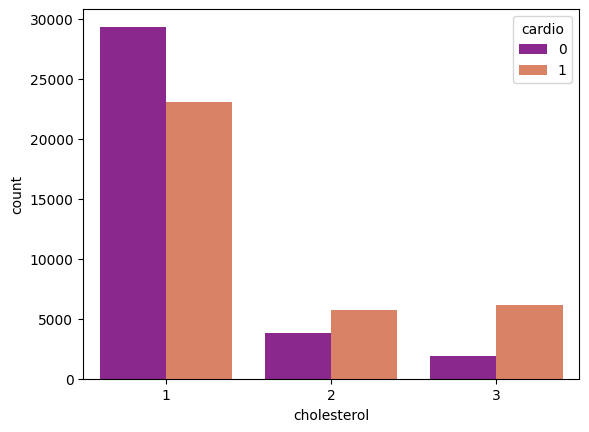

In [17]:
sns.countplot(x=df['cholesterol'],hue=df['cardio'],palette='plasma')

x:-
1-Normal
2-Above Normal
3-Well above normal

y:-
 0-No
 1-Yes

The people who are above normal have high rate of cardiac arrest as compared to others

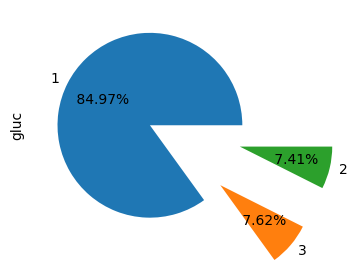

In [18]:
plt.figure(figsize=(3,3))
df['gluc'].value_counts().plot.pie(autopct='% 1.2f%%',explode=(0,1,1))
plt.show()


1-Normal
2-Above Normal
3-Well above normal


The people whoes glucose level are above normal have high rate of cardiac arrest as compared to others

<AxesSubplot:xlabel='smoke', ylabel='count'>

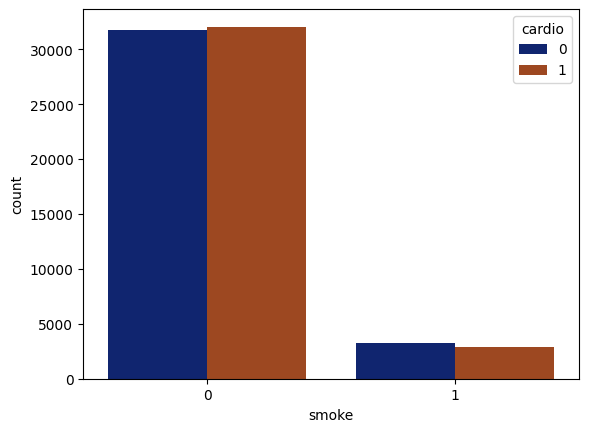

In [19]:
sns.countplot(data=df,x=df['smoke'],hue=df['cardio'],palette='dark')

People who desn't smoke has high amount or rate of cardio

<AxesSubplot:xlabel='alco', ylabel='count'>

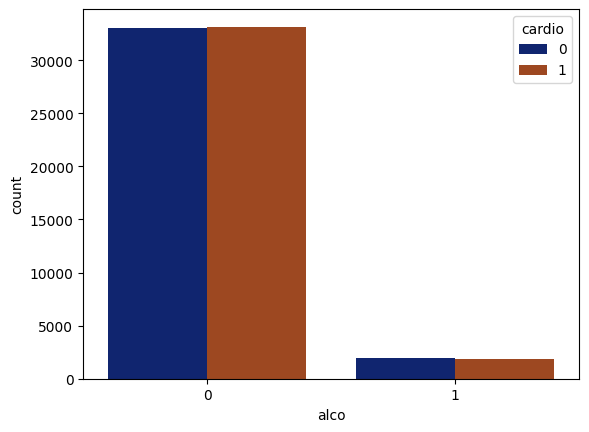

In [20]:
#plt.figure(figsize=(6,6))
#df['alco'].value_counts().plot.pie(autopct='% 1.2f%%',explode=(0,0))
#plt.show()


sns.countplot(data=df,x=df['alco'],hue=df['cardio'],palette='dark')

People who doesn't take alcohol has high amount or rate of cardio.

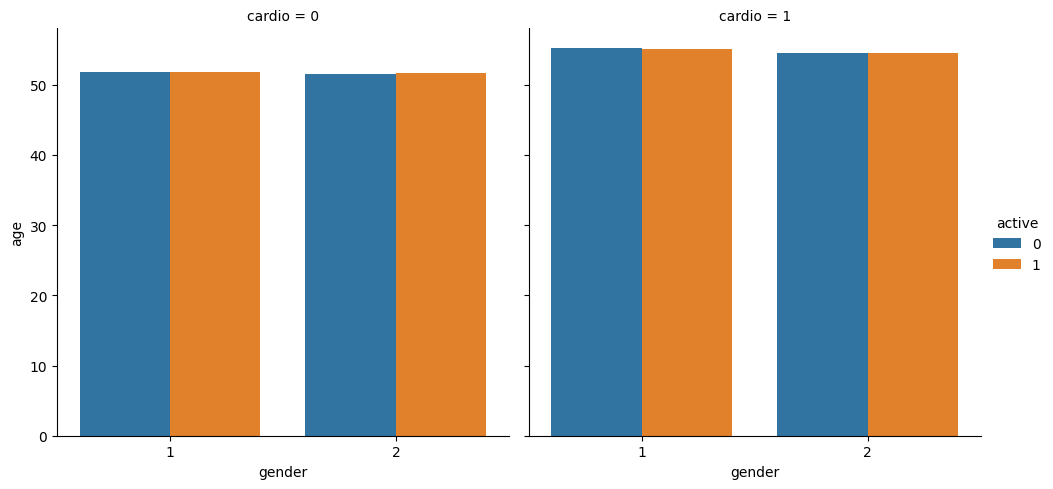

In [21]:
sns.catplot(x='gender',y='age',hue='active',col='cardio',kind='bar',data=df,ci=False)

People who does and desn't do any physical activity having same rate of cardio.

<AxesSubplot:xlabel='age', ylabel='count'>

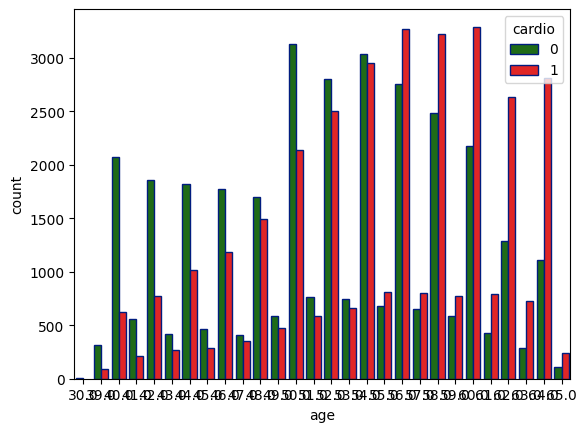

In [22]:
sns.countplot(x='age',hue='cardio',data=df,palette=['#137909','#ff0707'],edgecolor=sns.color_palette('dark',n_colors=1))

We see Diseases increased when age is increased.

#### Feature Scaling

In [23]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [24]:

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


## Splitting data into train and test data

In [25]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [29]:
xtrain.shape

(56000, 11)

In [30]:
xtest.shape

(14000, 11)

In [31]:
ytrain.shape

(56000,)

In [32]:
ytest.shape

(14000,)

## Model Building

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score

In [34]:
logreg=LogisticRegression()
knn=KNeighborsClassifier()
#svm=SVC()
dt=DecisionTreeClassifier()

In [35]:
def mymodel(model):
    model.fit(xtrain,ytrain) # build model
    ypred = model.predict(xtest) #predicted value of y
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    print(f'training accuracy {train}')
    print(f'testing accuracy {test}')
    print(f'Model Name : {model}')
    print(classification_report(ytest,ypred))

In [36]:
mymodel(logreg)

training accuracy 0.7220892857142858
testing accuracy 0.7225
Model Name : LogisticRegression()
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6917
           1       0.75      0.68      0.71      7083

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000



In [37]:
mymodel(knn)

training accuracy 0.763625
testing accuracy 0.6535
Model Name : KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      6917
           1       0.67      0.62      0.65      7083

    accuracy                           0.65     14000
   macro avg       0.65      0.65      0.65     14000
weighted avg       0.65      0.65      0.65     14000



In [38]:
mymodel(dt)

training accuracy 0.9761428571428571
testing accuracy 0.6365
Model Name : DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.63      0.66      0.64      6917
           1       0.65      0.62      0.63      7083

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000



## Bagging

In [39]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(dt)
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
cr = classification_report(ytest,ypred)
train = bg.score(xtrain,ytrain)
test = bg.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(dt)
print(cr)

training accuracy 0.9577678571428572
testing accuracy 0.6847142857142857
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      6917
           1       0.70      0.65      0.68      7083

    accuracy                           0.68     14000
   macro avg       0.69      0.69      0.68     14000
weighted avg       0.69      0.68      0.68     14000



## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
cr = classification_report(ytest,ypred)
train = rf.score(xtrain,ytrain)
test = rf.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(cr)

training accuracy 0.976125
testing accuracy 0.7132142857142857
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      6917
           1       0.72      0.71      0.71      7083

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



## Voting Classifier

In [41]:
models=[]
models.append(('logistic regression',logreg))
models.append(('KNN',knn))
#models.append(('Support vector machine',svm))
models.append(('Decision Tree',dt))

In [42]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=models)
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
cr = classification_report(ytest,ypred)
train = vc.score(xtrain,ytrain)
test = vc.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(cr)

training accuracy 0.8453571428571428
testing accuracy 0.7045
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      6917
           1       0.72      0.68      0.70      7083

    accuracy                           0.70     14000
   macro avg       0.71      0.70      0.70     14000
weighted avg       0.71      0.70      0.70     14000



## Boosting

### Adaptive Boosting

In [43]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(xtrain,ytrain)
ypred = ad.predict(xtest)
cr = classification_report(ytest,ypred)
train = ad.score(xtrain,ytrain)
test = ad.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(cr)

training accuracy 0.7314821428571429
testing accuracy 0.7309285714285715
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6917
           1       0.78      0.66      0.71      7083

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



###### Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
ypred = gb.predict(xtest)
cr = classification_report(ytest,ypred)
train = gb.score(xtrain,ytrain)
test = gb.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(cr)

training accuracy 0.7382321428571429
testing accuracy 0.7375
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6917
           1       0.76      0.70      0.73      7083

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



### Extreme Gradient Boost

In [45]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(xtrain,ytrain)
ypred = xg.predict(xtest)
cr = classification_report(ytest,ypred)
train = xg.score(xtrain,ytrain)
test = xg.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(cr)

training accuracy 0.7603392857142857
testing accuracy 0.7383571428571428
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6917
           1       0.76      0.70      0.73      7083

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



## HPT

In [46]:
from sklearn.model_selection import GridSearchCV
gbc = XGBClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(xtrain,ytrain)
ypred = cv.predict(xtest)
cr = classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6917
           1       0.77      0.69      0.73      7083

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



In [47]:
def newobs():
    Age=int(input('Enter Age:'))
    Gender=int(input('Enter Gender:'))
    Height=int(input('Enter height:'))
    Weight=int(input('Enter weight:'))
    ap_hi=int(input('Enter systallic Blood pressure:'))
    ap_lo=int(input('Enter diastolic Blood pressure:'))
    Cholesterol=int(input('Enter cholesterol level:'))
    Glucose=int(input('Enter glucose level:'))
    Smoke=int(input('Enter smoke concentration:'))
    Alcohol=int(input('Enter alcohol consumption:'))
    Active=int(input('Enter either Activity doing or not:'))
    obs=[[Age,Gender,Height,Weight,ap_hi,ap_lo,Cholesterol,Glucose,Smoke,Alcohol,Active]]
    a=sc.transform(obs)
    if gb.predict(a)== 0 :
        return f'Person Does not Have Chances of Cardiac Arrest'
    else:
        return f'Person Does Have Chances of Cardiac Arrest'

In [48]:
newobs()

Enter Age:57
Enter Gender:1
Enter height:173
Enter weight:58
Enter systallic Blood pressure:80
Enter diastolic Blood pressure:120
Enter cholesterol level:120
Enter glucose level:150
Enter smoke concentration:1
Enter alcohol consumption:1
Enter either Activity doing or not:0


'Person Does Have Chances of Cardiac Arrest'

In [49]:
newobs()

Enter Age:60
Enter Gender:1
Enter height:156
Enter weight:85
Enter systallic Blood pressure:140
Enter diastolic Blood pressure:90
Enter cholesterol level:3
Enter glucose level:1
Enter smoke concentration:0
Enter alcohol consumption:0
Enter either Activity doing or not:1


'Person Does Have Chances of Cardiac Arrest'

In [50]:
newobs()

Enter Age:52
Enter Gender:1
Enter height:165
Enter weight:64
Enter systallic Blood pressure:130
Enter diastolic Blood pressure:70
Enter cholesterol level:3
Enter glucose level:1
Enter smoke concentration:0
Enter alcohol consumption:0
Enter either Activity doing or not:0


'Person Does Have Chances of Cardiac Arrest'